In [14]:
#导入文件和目录处理模块os以及数据处理包pandas
import pandas as pd
import os
#定义函数datagena，输入为机组文件夹路径path_machine，输出为整合后csv数据文件的存放路径out_machine
def datagena(path_machine,out_machine):
    #读取机组文件夹下各数据组文件夹的路径并按文件名排序，保证整合时
    #数据组文件夹读取的顺序固定，使接下来的读取以a-e或1-5的顺序进行
    dirs_machine = os.listdir(path_machine)
    dirs_machine.sort()
    rpath_machine = [os.path.join(path_machine,name) for name in dirs_machine]
    #建立输入数据的dataframe对象
    df_machinerow = pd.DataFrame()
    #建立循环，对机组内数据组从a-e或1-5依次进行读取，进行数据整合
    for j in range(0,len(rpath_machine)):
        path_class = rpath_machine[j]
        label = dirs_machine[j]
        print("The name of datagroup is " + label)
        #读取数据组文件夹下各传感器采集文件夹的路径
        #使接下来的读取按照联端X、联端Y、非联端X、非联端Y、轴向A、轴向B进行
        dirs_class = os.listdir(path_class)
        dirs_class.sort()
        rpath_class = [os.path.join(path_class,name) for name in dirs_class]
        #print(rpath_class)
        #这里读取出所有传感器文件夹下包含wave文件的个数，计算出一个最小值，
        #以这个最小值作为读取文件数上限，使读取出的每一条数据都包含六个传感器的采集wave文件中数据
        minfile = []
        for k in range(0,len(rpath_class)):
            DIR = rpath_class[k]
            minfile.append(len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))
        minnum = min(minfile)
        #print(minnum)
        #建立循环，将本机组该数据组中所有名为wave_i的六个传感器的数据整合到一行
        df_classrow = []
        for i in range(1,minnum+1):
            filename = 'wave_' + str(i) + '.csv'
#             print("Now processing " + filename)
            #部分机组可能有rpath_class[6]即轴向C，在这里我们只读取前六个传感器数据
            file1 = os.path.join(rpath_class[0],filename)
            file2 = os.path.join(rpath_class[1],filename)
            file3 = os.path.join(rpath_class[2],filename)
            file4 = os.path.join(rpath_class[3],filename)
            file5 = os.path.join(rpath_class[4],filename)
            file6 = os.path.join(rpath_class[5],filename)
            df_onerow = []
            for filek in [file1,file2,file3,file4,file5,file6]:
                df_wave = pd.read_csv(filek,header=None,skiprows=5)
                df_else = pd.read_csv(filek,header=None,nrows=5)
                df_all = []
                df_all.append(float(df_else.iloc[0,1]))
                df_all.append(float(df_else.iloc[3,1]))
                df_all.extend(df_wave.iloc[0,1:])
                df_onerow.extend(df_all)
                del df_wave,df_else,df_all
            #在每一行最后增加两个属性，说明该行数据来自哪个机组数据组以及来源文件名
            df_onerow.append(label)
            df_onerow.append('wave_' + str(i))
            df_classrow.append(df_onerow)
        df_classrow = pd.DataFrame(df_classrow)
        #每个数据组的数据提取结束后，整合进该机组已提取完毕的数据中
        df_machinerow = pd.concat([df_machinerow,df_classrow])
    df_out = pd.DataFrame(df_machinerow)
    #输出到csv文件
    df_out.to_csv(out_machine,index=False)

#对全部18台机组的数据进行整合
datagena("dataset/rotor-ALL/dataset/training_data/M1","datacsv/train01.csv")
datagena("dataset/rotor-ALL/dataset/training_data/M2","datacsv/train02.csv")
datagena("dataset/rotor-ALL/dataset/training_data/M3","datacsv/train03.csv")
datagena("dataset/rotor-ALL/dataset/training_data/M4","datacsv/train04.csv")
datagena("dataset/rotor-ALL/dataset/training_data/M5","datacsv/train05.csv")
datagena("dataset/rotor-ALL/dataset/training_data/M6","datacsv/train06.csv")
datagena("dataset/rotor-ALL/dataset/training_data/M7","datacsv/train07.csv")
datagena("dataset/rotor-ALL/dataset/training_data/M8","datacsv/train08.csv")
datagena("dataset/rotor-ALL/dataset/training_data/M9","datacsv/train09.csv")
datagena("dataset/rotor-ALL/dataset/training_data/M10","datacsv/train10.csv")
datagena("dataset/rotor-ALL/dataset/testing_data/M11","datacsv/test11.csv")
datagena("dataset/rotor-ALL/dataset/testing_data/M12","datacsv/test12.csv")
datagena("dataset/rotor-ALL/dataset/testing_data/M13","datacsv/test13.csv")
datagena("dataset/rotor-ALL/dataset/testing_data/M14","datacsv/test14.csv")
datagena("dataset/rotor-ALL/dataset/testing_data/M15","datacsv/test15.csv")
datagena("dataset/rotor-ALL/dataset/testing_data/M16","datacsv/test16.csv")
datagena("dataset/rotor-ALL/dataset/testing_data/M17","datacsv/test17.csv")
datagena("dataset/rotor-ALL/dataset/testing_data/M18","datacsv/test18.csv")


The name of datagroup is M1a
The name of datagroup is M1b
The name of datagroup is M1c
The name of datagroup is M1d
The name of datagroup is M1e
The name of datagroup is M2a
The name of datagroup is M2b
The name of datagroup is M2c
The name of datagroup is M2d
The name of datagroup is M2e
The name of datagroup is M3a
The name of datagroup is M3b
The name of datagroup is M3c
The name of datagroup is M3d
The name of datagroup is M3e
The name of datagroup is M4a
The name of datagroup is M4b
The name of datagroup is M4c
The name of datagroup is M4d
The name of datagroup is M4e
The name of datagroup is M5a
The name of datagroup is M5b
The name of datagroup is M5c
The name of datagroup is M5d
The name of datagroup is M5e
The name of datagroup is M6_1
The name of datagroup is M6_2
The name of datagroup is M6_3
The name of datagroup is M6_4
The name of datagroup is M6_5
The name of datagroup is M7a
The name of datagroup is M7b
The name of datagroup is M7c
The name of datagroup is M7d
The name 

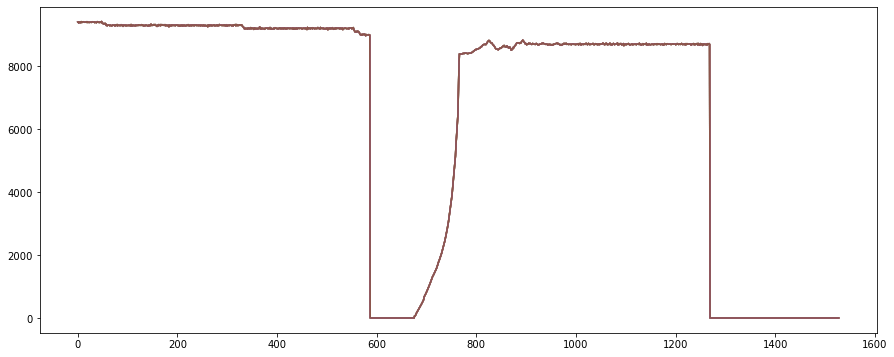

In [3]:
#导入作图相关库matplotlib和数据处理包pandas
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('datacsv/train2.csv')
#设置画布大小
plt.figure(figsize=(15,6))
#将6个传感器以叠加的形式呈现在画布上一起观察
for i in range(0,6):
    plt.plot(df.iloc[:,i*1026+1])
plt.show()

(1528, 6158)
(1164, 6158)


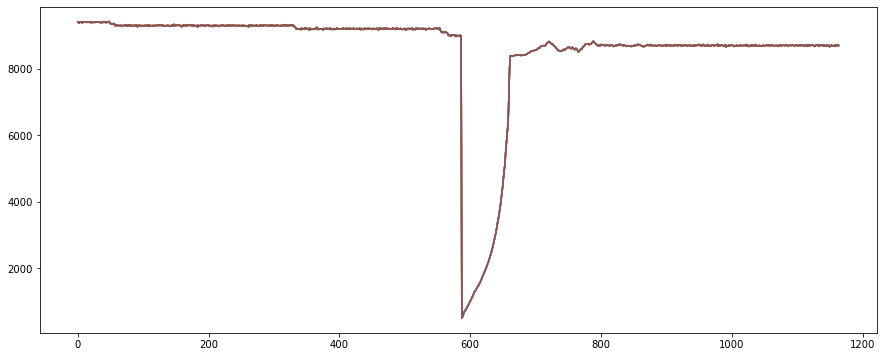

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('datacsv/train2.csv')
print(df.shape)
threhold = 500
df = df[(df.iloc[:,1]>threhold) & (df.iloc[:,1+1026]>threhold) & 
(df.iloc[:,1+1026*2]>threhold) & (df.iloc[:,1+1026*3]>threhold) & 
(df.iloc[:,1+1026*4]>threhold) & (df.iloc[:,1+1026*5]>threhold)]
df = df.reset_index(drop=True)
print(df.shape)
plt.figure(figsize=(15,6))
#将6个传感器以叠加的形式呈现在画布上一起观察
for i in range(0,6):
    plt.plot(df.iloc[:,i*1026+1])
plt.show()

In [ ]:
import pandas as pd
def datacleaning(input_file,threhold,output_file):
    df = pd.read_csv(input_file)
    print(df.shape)   
    df = df[(df.iloc[:,1]>threhold) & (df.iloc[:,1+1026]>threhold) & (df.iloc[:,1+1026*2]>threhold) & (df.iloc[:,1+1026*3]>threhold) & (df.iloc[:,1+1026*4]>threhold) & (df.iloc[:,1+1026*5]>threhold)]
    df = df.reset_index(drop=True)
    print(df.shape)
    df.to_csv(output_file,index=False)

datacleaning("datacsv/train01.csv",0,"datacleaned/train01.csv")
datacleaning("datacsv/train02.csv",0,"datacleaned/train02.csv")
datacleaning("datacsv/train03.csv",0,"datacleaned/train03.csv")
datacleaning("datacsv/train04.csv",0,"datacleaned/train04.csv")
datacleaning("datacsv/train05.csv",0,"datacleaned/train05.csv")
datacleaning("datacsv/train06.csv",0,"datacleaned/train06.csv")
datacleaning("datacsv/train07.csv",0,"datacleaned/train07.csv")
datacleaning("datacsv/train08.csv",0,"datacleaned/train08.csv")
datacleaning("datacsv/train09.csv",0,"datacleaned/train09.csv")
datacleaning("datacsv/train10.csv",0,"datacleaned/train10.csv")
datacleaning("datacsv/test11.csv",0,"datacleaned/test11.csv")
datacleaning("datacsv/test12.csv",0,"datacleaned/test12.csv")
datacleaning("datacsv/test13.csv",0,"datacleaned/test13.csv")
datacleaning("datacsv/test14.csv",0,"datacleaned/test14.csv")
datacleaning("datacsv/test15.csv",0,"datacleaned/test15.csv")
datacleaning("datacsv/test16.csv",0,"datacleaned/test16.csv")
datacleaning("datacsv/test17.csv",0,"datacleaned/test17.csv")
datacleaning("datacsv/test18.csv",0,"datacleaned/test18.csv")

In [16]:
#数据读取
import pandas as pd
df1 = pd.read_csv('datacleaned/train01.csv')
df2 = pd.read_csv('datacleaned/train02.csv')
df3 = pd.read_csv('datacleaned/train03.csv')
df4 = pd.read_csv('datacleaned/train04.csv')
df5 = pd.read_csv('datacleaned/train05.csv')
df6 = pd.read_csv('datacleaned/train06.csv')
#故障样本整合
df_fault = pd.concat([df1[df1.iloc[:,-2]=='M1a'],df2[df2.iloc[:,-2]=='M2a']])
df_fault = df_fault.reset_index(drop=True)
print(df_fault.shape)
df_fault['label'] = 1
#正常样本整合
df_normal = pd.concat([df3,df4,df6])
df_normal = df_normal.reset_index(drop=True)
print(df_normal.shape)
df_normal['label'] = 0
df_fault.to_csv('datacsv/data_fault.csv',index=False)
df_normal.to_csv('datacsv/data_normal.csv',index=False)

(608, 6158)
(4281, 6158)


In [18]:
import pandas as pd
import numpy as np
import os
from scipy import stats
from scipy import signal
#列名定义
df_out_columns = ['time_mean','time_std','time_max','time_min','time_rms',
                  'time_ptp','time_median','time_iqr','time_pr',
                  'time_skew','time_kurtosis','time_var','time_amp',
                  'time_smr','time_wavefactor','time_peakfactor',
                  'time_pulse','time_margin','1X','2X','3X','1XRatio',
                  '2XRatio','3XRatio']
CEX_columns = ['CEX_' + i for i in df_out_columns]
CEY_columns = ['CEY_' + i for i in df_out_columns]
NCEX_columns = ['NCEX_' + i for i in df_out_columns]
NCEY_columns = ['NCEY_' + i for i in df_out_columns]
SDA_columns = ['SDA_' + i for i in df_out_columns]
SDB_columns = ['SDB_' + i for i in df_out_columns]
label_columns = ['label']
full_columns = CEX_columns + CEY_columns + NCEX_columns + NCEY_columns + SDA_columns + SDB_columns + label_columns

def featureget(df_line):
    #提取时域特征
    time_mean = df_line.mean()
    time_std = df_line.std()
    time_max = df_line.max()
    time_min = df_line.min()
    time_rms = np.sqrt(np.square(df_line).mean().astype(np.float64))
    time_ptp = np.asarray(df_line).ptp()
    time_median = np.median(df_line)
    time_iqr = np.percentile(df_line,75)-np.percentile(df_line,25)
    time_pr = np.percentile(df_line,90)-np.percentile(df_line,10)
    time_skew = stats.skew(df_line)
    time_kurtosis = stats.kurtosis(df_line)
    time_var = np.var(df_line)
    time_amp = np.abs(df_line).mean()
    time_smr = np.square(np.sqrt(np.abs(df_line).astype(np.float64)).mean())
    #下面四个特征需要注意分母为0或接近0问题，可能会发生报错
    time_wavefactor = time_rms/time_amp
    time_peakfactor = time_max/time_rms
    time_pulse = time_max/time_amp
    time_margin = time_max/time_smr
    #提取频域特征倍频能量以及能量占比
    plist_raw = np.fft.fft(list(df_line), n=1024)
    plist = np.abs(plist_raw)
    plist_energy = (np.square(plist)).sum()
    #在傅里叶变换结果中，在32点处的幅值为一倍频幅值，64点处幅值为二倍频幅值，96点处为三倍频幅值，因此提取这三处幅值并计算能量占比
    return_list = [
    time_mean,time_std,time_max,time_min,time_rms,time_ptp, 
    time_median,time_iqr,time_pr,time_skew,time_kurtosis,
    time_var,time_amp,time_smr,time_wavefactor,time_peakfactor,
    time_pulse,time_margin,plist[32], plist[64], plist[96],
    np.square(plist[32]) / plist_energy,
    np.square(plist[64]) / plist_energy,
    np.square(plist[96]) / plist_energy
]
    return return_list

f_normal = pd.read_csv('datacsv/data_normal.csv')
feature_normal = []
for i in range(0,df_normal.shape[0]):
    feature_line = []
    #对整合后数据每个传感器采集的波形循环提取特征
    for j in range(0,6):
        feature_line.extend(featureget(df_normal.iloc[i,2+1026*j:1026*(j+1)]))
    feature_line.append(df_normal['label'][i])
    feature_normal.append(feature_line)
#输出到特定文件中
feature_normal = pd.DataFrame(feature_normal,columns=full_columns)
feature_normal.to_csv('featureset/feature_normal.csv',index=False)

In [21]:
df_fault = pd.read_csv('datacsv/data_fault.csv')
feature_fault = []
for i in range(0,df_fault.shape[0]):
    feature_line = []
    print(i)
    #对整合后数据每个传感器采集的波形循环提取特征
    for j in range(0,6):
        feature_line.extend(featureget(df_fault.iloc[i,2+1026*j:1026*(j+1)]))
    feature_line.append(df_fault['label'][i])
    feature_fault.append(feature_line)
#输出到特定文件中
feature_fault = pd.DataFrame(feature_fault,columns=full_columns)
feature_fault.to_csv('featureset/feature_fault.csv',index=False)

#使用for循环对测试集同样提取特征
for k in range(11,19):
    df_test = pd.read_csv('datacsv/test' + str(k) +'.csv')
    feature_test = []
    for i in range(0,df_test.shape[0]):
        feature_line = []
        print(i)
        #对整合后数据每个传感器采集的波形循环提取特征
        for j in range(0,6):
            feature_line.extend(featureget(df_test.iloc[i,2+1026*j:1026*(j+1)]))
        feature_line.append(df_test.iloc[i,-2])
        feature_test.append(feature_line)
    #输出到特定文件中
    feature_test = pd.DataFrame(feature_test,columns=full_columns)
    feature_test.to_csv('featureset/feature_test' + str(k) +'.csv',index=False)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1397
1398
1399
1400
1401
1402
1403
1404
1405
1406
1407
1408
1409
1410
1411
1412
1413
1414
1415
1416
1417
1418
1419
1420
1421
1422
1423
1424
1425
1426
1427
1428
1429
1430
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234


517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
744
745
746
747
748
749
750
751
752
753
754
755
756
757
758
759
760
761
762
763
764
765
766


1039
1040
1041
1042
1043
1044
1045
1046
1047
1048
1049
1050
1051
1052
1053
1054
1055
1056
1057
1058
1059
1060
1061
1062
1063
1064
1065
1066
1067
1068
1069
1070
1071
1072
1073
1074
1075
1076
1077
1078
1079
1080
1081
1082
1083
1084
1085
1086
1087
1088
1089
1090
1091
1092
1093
1094
1095
1096
1097
1098
1099
1100
1101
1102
1103
1104
1105
1106
1107
1108
1109
1110
1111
1112
1113
1114
1115
1116
1117
1118
1119
1120
1121
1122
1123
1124
1125
1126
1127
1128
1129
1130
1131
1132
1133
1134
1135
1136
1137
1138
1139
1140
1141
1142
1143
1144
1145
1146
1147
1148
1149
1150
1151
1152
1153
1154
1155
1156
1157
1158
1159
1160
1161
1162
1163
1164
1165
1166
1167
1168
1169
1170
1171
1172
1173
1174
1175
1176
1177
1178
1179
1180
1181
1182
1183
1184
1185
1186
1187
1188
1189
1190
1191
1192
1193
1194
1195
1196
1197
1198
1199
1200
1201
1202
1203
1204
1205
1206
1207
1208
1209
1210
1211
1212
1213
1214
1215
1216
1217
1218
1219
1220
1221
1222
1223
1224
1225
1226
1227
1228
1229
1230
1231
1232
1233
1234
1235
1236
1237
1238


52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313


602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
744
745
746
747
748
749
750
751
752
753
754
755
756
757
758
759
760
761
762
763
764
765
766
767
768
769
770
771
772
773
774
775
776
777
778
779
780
781
782
783
784
785
786
787
788
789
790
791
792
793
794
795
796
797
798
799
800
801
802
803
804
805
806
807
808
809
810
811
812
813
814
815
816
817
818
819
820
821
822
823
824
825
826
827
828
829
830
831
832
833
834
835
836
837
838
839
840
841
842
843
844
845
846
847
848
849
850
851


1105
1106
1107
1108
1109
1110
1111
1112
1113
1114
1115
1116
1117
1118
1119
1120
1121
1122
1123
1124
1125
1126
1127
1128
1129
1130
1131
1132
1133
1134
1135
1136
1137
1138
1139
1140
1141
1142
1143
1144
1145
1146
1147
1148
1149
1150
1151
1152
1153
1154
1155
1156
1157
1158
1159
1160
1161
1162
1163
1164
1165
1166
1167
1168
1169
1170
1171
1172
1173
1174
1175
1176
1177
1178
1179
1180
1181
1182
1183
1184
1185
1186
1187
1188
1189
1190
1191
1192
1193
1194
1195
1196
1197
1198
1199
1200
1201
1202
1203
1204
1205
1206
1207
1208
1209
1210
1211
1212
1213
1214
1215
1216
1217
1218
1219
1220
1221
1222
1223
1224
1225
1226
1227
1228
1229
1230
1231
1232
1233
1234
1235
1236
1237
1238
1239
1240
1241
1242
1243
1244
1245
1246
1247
1248
1249
1250
1251
1252
1253
1254
1255
1256
1257
1258
1259
1260
1261
1262
1263
1264
1265
1266
1267
1268
1269
1270
1271
1272
1273
1274
1275
1276
1277
1278
1279
1280
1281
1282
1283
1284
1285
1286
1287
1288
1289
1290
1291
1292
1293
1294
1295
1296
1297
1298
1299
1300
1301
1302
1303
1304


In [22]:
import pandas as pd
feature_normal = pd.read_csv('featureset/feature_normal.csv')
feature_fault = pd.read_csv('featureset/feature_fault.csv')
#这里将正常样本和故障征兆样本合并
feature_final = pd.concat([feature_normal,feature_fault])
#重置索引，否则可能造成索引混乱
feature_final = feature_final.reset_index(drop=True)
#可以修改以下list调整需要留下的特征
feature_selected_list = ['CEX_1XRatio','CEX_2XRatio','CEX_3XRatio',
                         'CEY_1XRatio','CEY_2XRatio','CEY_3XRatio',
                         'NCEX_1XRatio','NCEX_2XRatio','NCEX_3XRatio',
                         'NCEY_1XRatio','NCEY_2XRatio','NCEY_3XRatio',
                         'SDA_1XRatio','SDA_2XRatio','SDA_3XRatio',
                         'SDB_1XRatio','SDB_2XRatio','SDB_3XRatio',
                         'CEX_time_ptp','CEY_time_ptp','NCEX_time_ptp','NCEY_time_ptp',
                         'SDA_time_ptp','SDB_time_ptp','label']
feature_selected = feature_final[feature_selected_list]
#筛选后特征保存
feature_selected.to_csv('featureset/feature_selected.csv',index=False)

In [23]:
#用for循环同样处理测试集
for i in range(11,19):
    feature_test = pd.read_csv('featureset/feature_test' + str(i) +'.csv')
    feature_selected_test = feature_test[feature_selected_list]
    feature_selected_test.to_csv('featureset/test'+ str(i) + '_selected.csv',index=False)

In [24]:
import lightgbm as lgb
import numpy as np
import pandas as pd
import joblib


def train():
    # 模型初始化，设置random_state保证可复现性，便于观察优化
    train_data = pd.read_csv('featureset/feature_selected.csv')
    train_data_y = train_data['label']
    # 除去标签的所有列就是特征
    train_data_x = train_data.drop(['label'], axis=1)
    model_lgb_default = lgb.LGBMClassifier(random_state=2019)
    # 模型训练
    model_lgb_default.fit(train_data_x, train_data_y)
    joblib.dump(model_lgb_default, 'model/lightgbm_model.model')

# 这里首先定义judge函数，以threhold为阈值，根据模型给出的分类概率进行判断，大于
# threhold为正常样本，反之为故障征兆样本


def judge(input_pred, threshold):
    return_pred = list(np.zeros(len(input_pred)))
    for i in range(0, len(input_pred)):
        if (input_pred[i][0] > threshold):
            return_pred[i] = 0
        else:
            return_pred[i] = 1
    return return_pred


def test_lightgbm():
    # 加载模型
    model = joblib.load('model/lightgbm_model.model')
    # 读取测试集,来源的特征文件同样经过特征提取和选择，只是不加标签，'label'列中表示
    # 其机组和数据组的信息，例如'M11_1'，方便我们统计各数据组的分类概率统计值进行排序
    test_m11 = pd.read_csv('featureset/test11_selected.csv')
    test_m12 = pd.read_csv('featureset/test12_selected.csv')
    test_m13 = pd.read_csv('featureset/test13_selected.csv')
    test_m14 = pd.read_csv('featureset/test14_selected.csv')
    test_m15 = pd.read_csv('featureset/test15_selected.csv')
    test_m16 = pd.read_csv('featureset/test16_selected.csv')
    test_m17 = pd.read_csv('featureset/test17_selected.csv')
    test_m18 = pd.read_csv('featureset/test18_selected.csv')
    # 对8个测试集循环进行测试
    h = 11
    for test_i in [test_m11, test_m12, test_m13, test_m14, test_m15, test_m16,
                   test_m17, test_m18]:
        test_name = 'test_m' + str(h)
        print('The result of test is:')
        print('filename  datagroup  normal  fault  fault-probability-of-datagroup')
        max_j = {}
        for j in range(1, 6):
            labelname = 'M' + str(h) + '_' + str(j)
            test_j = test_i[test_i['label'] == labelname]
            test_feature = test_j.drop(['label'], axis=1)
            y_pred = model.predict_proba(test_feature)
            y_pred_binary = judge(y_pred, 0.5)
            y_pred_mean = np.mean([x[1] for x in y_pred])
            max_j[j] = y_pred_mean
            print(test_name, j, y_pred_binary.count(0), y_pred_binary.count(1),
                  y_pred_mean)
        h = h + 1
        print("The order a-e is:")
        for k in sorted(max_j, key=max_j.__getitem__, reverse=True):
            print(k, max_j[k])


train()
test_lightgbm()


The result of test is:
filename  datagroup  normal  fault  fault-probability-of-datagroup
test_m11 1 0 286 0.9991906175766887
test_m11 2 0 286 0.9991906175766887
test_m11 3 0 287 0.9991906175766887
test_m11 4 0 287 0.9991906175766887
test_m11 5 8 277 0.96275376328498
The order a-e is:
1 0.9991906175766887
2 0.9991906175766887
3 0.9991906175766887
4 0.9991906175766887
5 0.96275376328498
The result of test is:
filename  datagroup  normal  fault  fault-probability-of-datagroup
test_m12 1 286 0 0.0018299268230094433
test_m12 2 286 0 0.0009119926666514153
test_m12 3 287 0 0.0008394501860705095
test_m12 4 288 0 0.0008940080073859693
test_m12 5 290 0 0.014384038483992103
The order a-e is:
5 0.014384038483992103
1 0.0018299268230094433
2 0.0009119926666514153
4 0.0008940080073859693
3 0.0008394501860705095
The result of test is:
filename  datagroup  normal  fault  fault-probability-of-datagroup
test_m13 1 0 291 0.9991415520654828
test_m13 2 0 287 0.9989856920965556
test_m13 3 0 288 0.999128036